In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import cm
import seaborn as sns
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from IPython.display import clear_output

from scipy.signal import savgol_filter

plt.rcParams['figure.figsize']=[18,12]

%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from matplotlib.dates import date2num

In [119]:
df=pd.read_csv('VI_sep_18_19.csv')

In [120]:
df

,date,I-FVC,R-FVC,I-fpar,R-fpar,I-EVI,R-EVI,I-LAI,R-LAI,I-NDVI,R-NDVI,I-RVI,R-RVI
0,11/12/2018,0.054816,0.058903,0.122898,0.126923,0.040105,0.045203,0.146433,0.163449,0.090045,0.101814,0.155714,0.286212
1,1/21/2019,0.630799,0.596494,0.706825,0.712615,0.272195,0.350412,1.595011,1.463695,0.815662,0.827510,0.531150,0.358767
2,1/26/2019,0.607139,0.582346,0.714371,0.713142,0.593685,0.647501,1.659817,1.543409,0.810192,0.831082,0.607524,0.387649
3,1/31/2019,0.776292,0.697686,0.816839,0.786450,0.617693,0.667528,2.778043,2.193220,0.764731,0.799484,0.614742,0.410751
4,2/5/2019,0.726760,0.643381,0.791690,0.757531,0.661569,0.740687,2.358330,1.927933,0.916997,0.900447,0.598422,0.488175
5,2/20/2019,0.814311,0.680914,0.855023,0.768548,0.698133,0.743524,3.234314,2.210672,0.924652,0.891483,0.811387,0.638828
6,3/12/2019,0.803375,0.628096,0.853681,0.707271,0.726209,0.711361,3.513349,2.070533,0.914038,0.844355,0.881827,0.791989
7,4/11/2019,0.784640,0.584902,0.840791,0.665452,0.721882,0.625417,3.878496,2.191626,0.945844,0.858856,0.803769,0.661338
8,5/1/2019,0.648168,0.462450,0.701746,0.530020,0.717860,0.559615,2.408967,1.321345,0.727054,0.601638,0.747657,0.461444
9,5/11/2019,0.784546,0.654913,0.807770,0.698140,0.594236,0.497292,3.735531,2.397724,0.846367,0.740831,0.610079,0.519080


In [121]:
#format date
df['date'] = pd.to_datetime(df['date'])
df.sort_values('date', inplace=True)

date = df['date'].to_list()

In [122]:
#df=df.set_index('date')

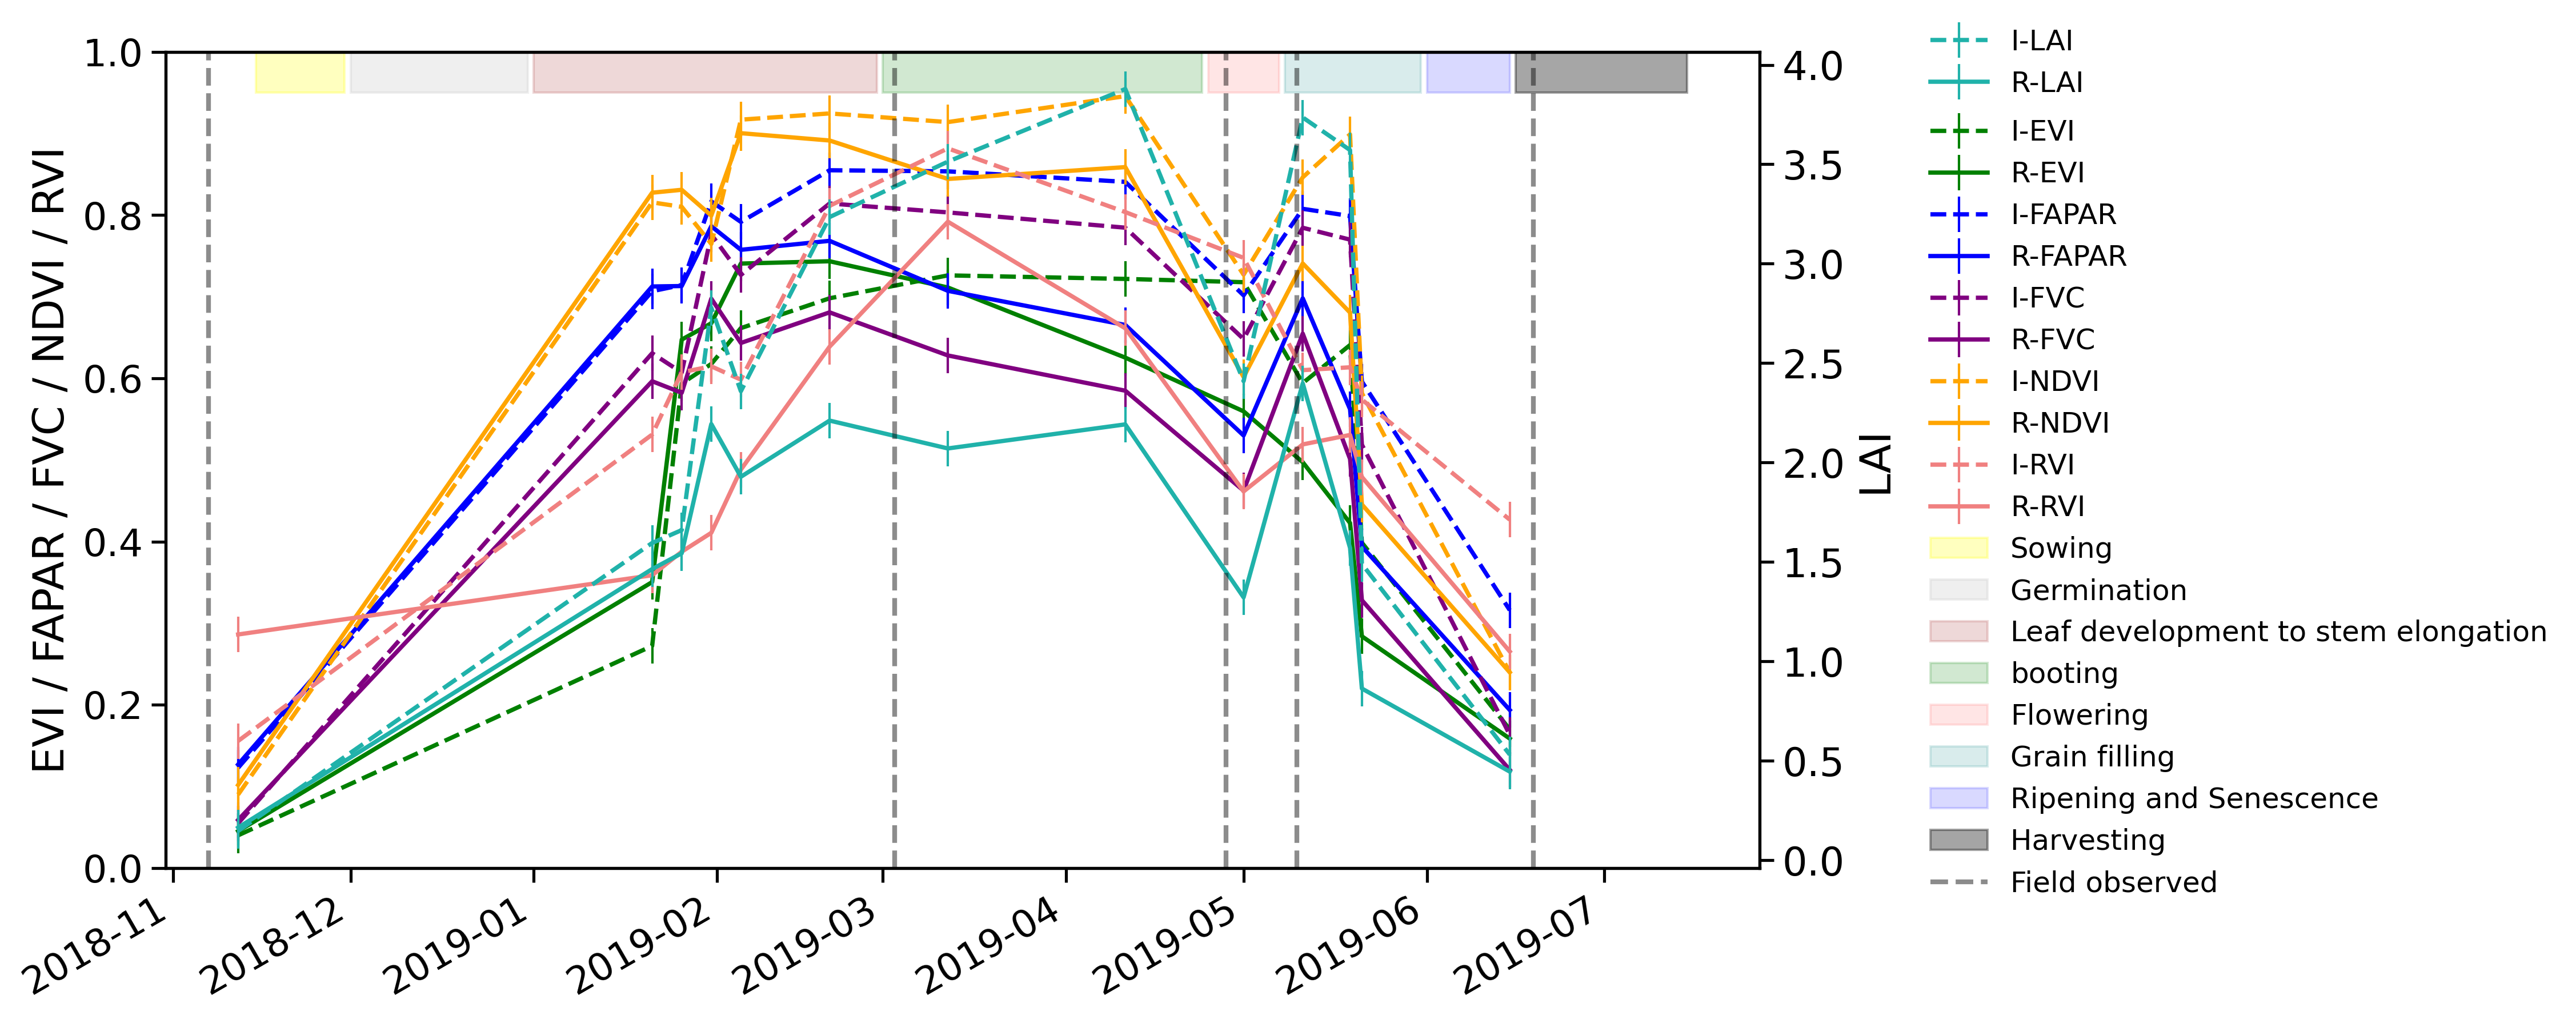

In [125]:
fig, ax1 = plt.subplots(figsize = (12, 7), dpi=150)

# # Set tick font size
for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(16)
    
ax2= ax1.twinx()


evi_irri = df['I-EVI'].to_list()
evi_rain = df['R-EVI'].to_list()

fpar_irri = df['I-fpar'].to_list()
fpar_rain = df['R-fpar'].to_list()

fvc_irri = df['I-FVC'].to_list()
fvc_rain = df['R-FVC'].to_list()

ndvi_irri = df['I-NDVI'].to_list()
ndvi_rain = df['R-NDVI'].to_list()

RVI_irri = df['I-RVI'].to_list()
RVI_rain = df['R-RVI'].to_list()

LAI_irri = df['I-LAI'].to_list()
LAI_rain = df['R-LAI'].to_list()


# apply SavGol filter for smoothing
#RVI_irri = savgol_filter(RVI_irri, window_length=3, polyorder=1)
#RVI_rain = savgol_filter(RVI_rain, window_length=3, polyorder=1)


# plot the smoothened against the axes
ax1.plot(date, evi_irri, color='green', marker="|", linestyle='--', linewidth= 1.8,  markersize=15, label='I-EVI')
ax1.plot(date, evi_rain, color='green', marker="|", linestyle='-', linewidth= 1.8,  markersize=15, label='R-EVI')

ax1.plot(date, fpar_irri, color='blue', marker="|", linestyle='--', linewidth= 1.8,  markersize=15, label='I-FAPAR')
ax1.plot(date, fpar_rain, color='blue', marker="|", linestyle='-', linewidth= 1.8,  markersize=15, label='R-FAPAR')

ax1.plot(date, fvc_irri, color='purple', marker="|", linestyle='--', linewidth= 1.8,  markersize=15, label='I-FVC')
ax1.plot(date, fvc_rain, color='purple', marker="|", linestyle='-', linewidth= 1.8,  markersize=15, label='R-FVC')

ax1.plot(date, ndvi_irri, color='orange', marker="|", linestyle='--', linewidth= 1.8,  markersize=15, label='I-NDVI')
ax1.plot(date, ndvi_rain, color='orange', marker="|", linestyle='-', linewidth= 1.8,  markersize=15, label='R-NDVI')

ax1.plot(date, RVI_irri, color='lightcoral', marker="|", linestyle='--', linewidth= 1.8,  markersize=15, label='I-RVI')
ax1.plot(date, RVI_rain, color='lightcoral', marker="|", linestyle='-', linewidth= 1.8,  markersize=15, label='R-RVI')

ax2.plot(date, LAI_irri, color='lightseagreen', marker="|", linestyle='--', linewidth= 1.8,  markersize=15, label='I-LAI')
ax2.plot(date, LAI_rain, color='lightseagreen', marker="|", linestyle='-', linewidth= 1.8,  markersize=15, label='R-LAI')

# colorful breaks
ax1.axvspan(date2num(datetime(2018,11,15)), date2num(datetime(2018,11,30)), 
           label="Sowing",color="yellow", alpha=0.25, ymax = 1, ymin= 0.95)

ax1.axvspan(date2num(datetime(2018,12, 1)), date2num(datetime(2018,12,31)), 
           label="Germination ",color="silver", alpha=0.25, ymax = 1, ymin= 0.95)


ax1.axvspan(date2num(datetime(2019,1,1)), date2num(datetime(2019,2,28)), 
           label="Leaf development to stem elongation",color="brown", alpha=0.18, ymax = 1, ymin= 0.95)


ax1.axvspan(date2num(datetime(2019,3,1)), date2num(datetime(2019,4,24)), 
           label="booting",color="green", alpha=0.18, ymax = 1, ymin= 0.95)

ax1.axvspan(date2num(datetime(2019,4,25)), date2num(datetime(2019,5,7)), 
           label="Flowering",color="red", alpha=0.10, ymax = 1, ymin= 0.95)

ax1.axvspan(date2num(datetime(2019,5,8)), date2num(datetime(2019,5,31)),
            label= "Grain filling", color="teal", alpha=0.15, ymax = 1, ymin= 0.95)

ax1.axvspan(date2num(datetime(2019,6,1)), date2num(datetime(2019,6,15)),
            label= "Ripening and Senescence", color="blue", alpha=0.15, ymax = 1, ymin= 0.95)

ax1.axvspan(date2num(datetime(2019,6,16)), date2num(datetime(2019,7,15)), 
           label="Harvesting ",color="black", alpha=0.35, ymax = 1, ymin= 0.95)


#add customized vertical line at 1/5/2023
import datetime as dt


plt.axvline(dt.datetime(2018, 11, 7), color='black', alpha=0.45, linewidth=2, linestyle='--')
plt.axvline(dt.datetime(2019, 3, 3), color='black', alpha=0.45, linewidth=2, linestyle='--')
plt.axvline(dt.datetime(2019, 4, 28), color='black', alpha=0.45, linewidth=2, linestyle='--')
plt.axvline(dt.datetime(2019, 5, 10), color='black', alpha=0.45, linewidth=2, linestyle='--')
#plt.axvline(dt.datetime(2019, 6, 19), color='black', alpha=0.45, linewidth=2, linestyle='--')
ax1.axvline(dt.datetime(2019, 6, 19), color='black', alpha=0.45, linewidth=2, linestyle='--', label="Field observed")


#Autodate format
plt.gcf().autofmt_xdate()

# label the axes and title the plot
ax.set_xlabel('Date')
ax2.set_ylabel('LAI')
ax1.set_ylabel('EVI / FAPAR / FVC / NDVI / RVI')
# ax.set_title('Sentinel 1 Backscatter Timeseries for a Point')

#Add legend
#plt.legend(loc='upper right')

ax1.set_ylim([0, 1])
#ax2.set_ylim([0, 3.5])


ax1.legend(loc = (1.1, -.05), frameon = False, prop={'size': 12})
ax2.legend( loc = (1.1, .93), frameon = False, prop={'size': 12})
